<a href="https://colab.research.google.com/github/RegarMonu/StockPrice/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
# from sklearn.metrics import accuracy

In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf

msft = yf.Ticker("AAPL")


/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [ ]:
df=msft.history(period='max')
df.shape

(10881, 7)

In [ ]:
# df.to_csv('AAPL.csv')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099192,0.099623,0.099192,0.099192,469033600,0.00,0.0
1980-12-15 00:00:00-05:00,0.094448,0.094448,0.094017,0.094017,175884800,0.00,0.0
1980-12-16 00:00:00-05:00,0.087548,0.087548,0.087117,0.087117,105728000,0.00,0.0
1980-12-17 00:00:00-05:00,0.089273,0.089704,0.089273,0.089273,86441600,0.00,0.0
1980-12-18 00:00:00-05:00,0.091861,0.092292,0.091861,0.091861,73449600,0.00,0.0
...,...,...,...,...,...,...,...
2024-02-05 00:00:00-05:00,187.910213,189.008818,185.603160,187.440811,69668800,0.00,0.0
2024-02-06 00:00:00-05:00,186.621869,189.068743,186.531987,189.058762,43490800,0.00,0.0
2024-02-07 00:00:00-05:00,190.397053,190.806534,188.369641,189.168625,53439000,0.00,0.0


In [ ]:
df=pd.read_csv('AAPL.csv')
df.shape

(10881, 8)

In [ ]:
df1=df.reset_index()['Close']

In [ ]:
df1

0          0.099192
1          0.094017
2          0.087117
3          0.089273
4          0.091861
            ...    
10876    187.440811
10877    189.058762
10878    189.168625
10879    188.080017
10880    188.850006
Name: Close, Length: 10881, dtype: float64

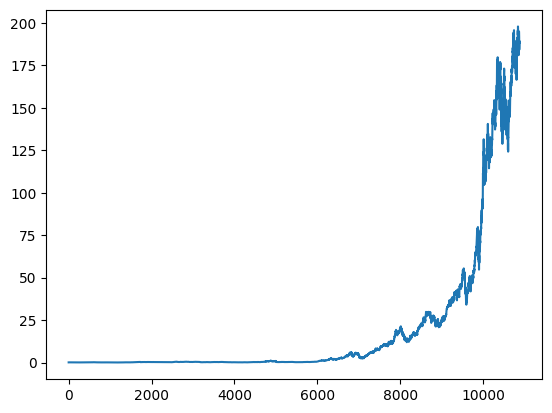

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
df1.shape

(10881,)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
training_size=int(len(df1)*0.67)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
train_data.shape,test_data.shape

((7290, 1), (3591, 1))

In [ ]:
def create_dataset(dataset,time_step=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)

In [ ]:
time_step=250
x_train,y_train=create_dataset(train_data,time_step)
x_test,y_test=create_dataset(test_data,time_step)

In [ ]:
x_train

array([[0.00030958, 0.00028342, 0.00024853, ..., 0.00013953, 0.00014171,
        0.00013517],
       [0.00028342, 0.00024853, 0.00025943, ..., 0.00014171, 0.00013517,
        0.00013735],
       [0.00024853, 0.00025943, 0.00027252, ..., 0.00013517, 0.00013735,
        0.00013735],
       ...,
       [0.02779709, 0.02842222, 0.02944628, ..., 0.0143284 , 0.01482821,
        0.0142902 ],
       [0.02842222, 0.02944628, 0.0301937 , ..., 0.01482821, 0.0142902 ,
        0.01439413],
       [0.02944628, 0.0301937 , 0.03021663, ..., 0.0142902 , 0.01439413,
        0.01343579]])

In [ ]:
x_train.shape

(7039, 250)

In [ ]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# model=Sequential()
# model.add(LSTM(50,return_sequences=True,input_shape=(250,1)))
# model.add(LSTM(50,return_sequences=True))
# model.add(LSTM(50))
# model.add(Dense(1))
# model.compile(loss='mean_squared_error',optimizer='adam')

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(250,1)))
model.add(Dropout(0.3))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(50))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 250, 50)           10400     
                                                                 
 dropout_3 (Dropout)         (None, 250, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 250, 50)           20200     
                                                                 
 dropout_4 (Dropout)         (None, 250, 50)           0         
                                                                 
 lstm_6 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_5 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                

In [ ]:
# model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test), callbacks=[early_stopping])

Epoch 1/100
220/220 [==============================] - 15s 33ms/step - loss: 9.9458e-06 - val_loss: 0.0098
Epoch 2/100
220/220 [==============================] - 7s 30ms/step - loss: 2.2898e-06 - val_loss: 0.0061
Epoch 3/100
220/220 [==============================] - 6s 29ms/step - loss: 2.5179e-06 - val_loss: 0.0049
Epoch 4/100
220/220 [==============================] - 6s 29ms/step - loss: 1.5703e-06 - val_loss: 0.0028
Epoch 5/100
220/220 [==============================] - 6s 30ms/step - loss: 1.5150e-06 - val_loss: 0.0062
Epoch 6/100
220/220 [==============================] - 6s 28ms/step - loss: 1.5924e-06 - val_loss: 0.0051
Epoch 7/100
220/220 [==============================] - 7s 31ms/step - loss: 2.1525e-06 - val_loss: 0.0082
Epoch 8/100
220/220 [==============================] - 6s 27ms/step - loss: 1.3890e-06 - val_loss: 0.0045
Epoch 9/100
220/220 [==============================] - 8s 37ms/step - loss: 1.5297e-06 - val_loss: 0.0023
Epoch 10/100
220/220 [=======================

In [ ]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

105/105 [==============================] - 1s 10ms/step


In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
import math
from sklearn.metrics import mean_squared_error,accuracy_score
math.sqrt(mean_squared_error(y_train,train_predict))

1.501874569851295

In [ ]:
math.sqrt(mean_squared_error(y_test,test_predict))

75.59603759944173

In [ ]:
look_back=150
trainPredictPlot=np.empty_like(df1)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict

testPredictPlot=np.empty_like(df1)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:]=test_predict

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

ValueError: could not broadcast input array from shape (1778,1) into shape (1878,1)

In [ ]:
len(test_data)-150

In [ ]:
x_ip=test_data[1829:].reshape(1,-1)
x_ip.shape

In [ ]:
temp_ip=list(x_ip)
temp_ip=temp_ip[0].tolist()

In [ ]:
lst_output=[]
n_steps=150
i=0
while(i<30):
  if(len(temp_ip)>150):
    x_ip=np.array(temp_ip[1:])
    print('{} day input {}'.format(i,x_ip))
    x_ip=x_ip.reshape(1,-1)
    x_ip=x_ip.reshape((1,n_steps,1))
    yhat=model.predict(x_ip,verbose=-1)
    print('{} day output {}'.format(i,yhat))
    temp_ip.extend(yhat[0].tolist())
    temp_ip=temp_ip[1:]
    lst_output.extend(yhat.tolist())
    i=i+1
  else:
    x_ip=x_ip.reshape((1,n_steps,1))
    yhat=model.predict(x_ip,verbose=-1)
    print(yhat[0])
    temp_ip.extend(yhat[0].tolist())
    print(len(temp_ip))
    lst_output.extend(yhat.tolist())
    i=i+1
print(lst_output)

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
len(df1)

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
len(df3)

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[5410:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))


In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[5510:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

In [ ]:
plt.plot(df3)

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
# import streamlit as st

In [ ]:
!pip install yfinance

In [ ]:
def load_data(company_name, start_date, end_date):
    stock = yf.Ticker(company_name)
    df = stock.history(start=start_date, end=end_date)
    return df

In [ ]:
def load_data(company_name, start_date, end_date):
    stock = yf.Ticker(company_name)
    df = stock.history(start=start_date, end=end_date)
    return df

In [ ]:
def preprocess_data(df):
    df_close = df.reset_index()['Close']
    scaler = MinMaxScaler(feature_range=(0, 1))
    df_scaled = scaler.fit_transform(np.array(df_close).reshape(-1, 1))
    return df_scaled, scaler

In [ ]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
def build_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.3))
    model.add(LSTM(50, return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(50))
    model.add(Dropout(0.3))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
def train_model(model, x_train, y_train, x_test, y_test, epochs=100, batch_size=32):
    early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), callbacks=[early_stopping])
    return model

In [ ]:
def predict_future_stock_prices(model, last_sequence, n_steps, scaler, n_days):
    temp_input = last_sequence.tolist()
    lst_output = []

    for i in range(n_days):
        if len(temp_input) > n_steps:
            x_ip = np.array(temp_input[1:])
            x_ip = x_ip.reshape(1, -1)
            x_ip = x_ip.reshape((1, n_steps, 1))
            yhat = model.predict(x_ip, verbose=-1)
            temp_input.extend(yhat[0].tolist())
            temp_input = temp_input[1:]
            lst_output.extend(yhat.tolist())
        else:
            # x_ip = np.array(temp_input)
            x_ip = x_ip.reshape((1, n_steps, 1))
            yhat = model.predict(x_ip, verbose=-1)
            temp_input.extend(yhat[0].tolist())
            lst_output.extend(yhat.tolist())

    predicted_stock_prices = scaler.inverse_transform(lst_output)
    return predicted_stock_prices

In [ ]:
def main():
    print("Stock Price Prediction with LSTM")

    # Input parameters
    company_name = input("Enter Company Ticker (e.g., AAPL for Apple):")
    start_date = pd.to_datetime(input("Enter Start Date (YYYY-MM-DD):"))
    end_date = pd.to_datetime(input("Enter End Date (Leave empty for today):"))
    if not end_date:
        end_date = pd.to_datetime("today")

    n_days_to_predict = int(input("Select Number of Days to Predict:"))

    # Load and preprocess data
    df = load_data(company_name, start_date, end_date)
    df_scaled, scaler = preprocess_data(df)

    # Prepare training and testing data
    time_step = 90
    x_train, y_train = create_dataset(df_scaled[:int(len(df_scaled) * 0.67)], time_step)
    x_test, y_test = create_dataset(df_scaled[int(len(df_scaled) * 0.67):], time_step)

    x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
    x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

    # Build and train the model
    input_shape = (time_step, 1)
    model = build_model(input_shape)
    model = train_model(model, x_train, y_train, x_test, y_test)

    # Predict future stock prices
    last_sequence = df_scaled[-time_step:]
    predicted_prices = predict_future_stock_prices(model, last_sequence, time_step, scaler, n_days_to_predict)

    # Display the predicted prices
    print("Predicted Stock Prices:")
    print(pd.DataFrame(predicted_prices, columns=["Predicted Prices"]))

# Call the main function
if __name__ == "__main__":
    main()


Stock Price Prediction with LSTM
Enter Company Ticker (e.g., AAPL for Apple):msft


In [ ]:
import pytz